<a href="https://colab.research.google.com/github/Pmei0617/Bike-Rental-Prediction/blob/main/Predict_bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The goal of this analysis is to:
* Understand the bike data through exploratory data analysis
* Predict daily bike rentals using linear regression

*In generating the analysis, data about bike-rentals over a two-year period is used*

####We will start by importing the neccessary python libraries to help generate our analysis

In [ ]:
# Import needed python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

####Load in the bike data to learn about this dataset's dimensions, data types, and a quick preview of what our dataset looks like

In [ ]:
# Load the following CSV file:  http://bit.ly/bike-data
url = 'http://bit.ly/bike-data'
df_bike = pd.read_csv(url)

In [ ]:
# Calculate the dimensions in the dataset
df_bike.shape

(731, 14)

In [ ]:
df_bike.dtypes

ID                      int64
date                   object
yr                      int64
mnth                    int64
weekday                 int64
season                  int64
holiday                 int64
working_day             int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual_rentals          int64
registered_rentals      int64
dtype: object

In [ ]:
# Preview the first 5 records of the dataset
df_bike.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


####We will go ahead and create a new column in our dataset called "total_rentals" that sums up "casual_rentals" and "registered_rentals" columns. This can give us a better idea of the total number of bikes rented per day. 

In [ ]:
# Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns.
df_bike['total_rentals'] = df_bike['casual_rentals'] + df_bike['registered_rentals']
df_bike.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####We will generate a quick statistical summary to see the basic stats, check if out data count is align with the number of rows

In [ ]:
# Generate descriptive stats for the numeric columns in the dataset
df_bike.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####We want to get an idea of how the total and average bike rentals vary by month and by the two years given. Generating a pivot table will let us understand clearly. 

In [ ]:
# Create a pivot table that has "yr" and "mnth" as indices(in that order) and that sums and averages "total_rentals"
bike_pivot = pd.pivot_table(data=df_bike, index=['yr', 'mnth'], values=['total_rentals'], aggfunc=['std', 'mean']);
bike_pivot

std          mean
        total_rentals total_rentals
yr mnth                            
0  1       372.432665   1231.903226
   2       398.508839   1721.964286
   3       550.971716   2065.967742
   4      1042.093593   3162.333333
   5       572.927883   4381.322581
   6       444.447812   4783.733333
   7       680.090762   4559.387097
   8       809.852401   4409.387097
   9       965.377251   4247.266667
   10     1103.481844   3984.225806
   11      788.249290   3405.566667
   12      958.763187   2816.870968
1  1       872.852134   3120.774194
   2       870.724640   3556.448276
   3      1251.162682   5318.548387
   4      1308.938916   5807.466667
   5      1078.403997   6318.225806
   6       954.204995   6761.000000
   7       867.183736   6567.967742
   8       794.059017   6919.451613
   9       979.160925   7285.766667
   10     1941.819400   6414.225806
   11     1129.731198   5088.800000
   12     1803.227864   3990.741935

####We will look for any missing values in our dataset. If there is any, we will drop them

In [ ]:
# Determine whether or not there are any missing values in the dataset
# If there are any missing valuse, drop the rows containing those values
df_bike.isna().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

####Using a historgram, we can visualize the distribution of "total_rentals"

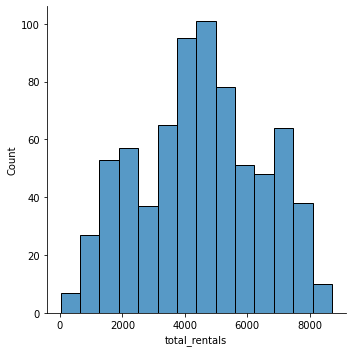

In [ ]:
# Generate a histogram to visualize the distribution of data in the "total_rentals" column.  (Use seaborn's "displot" function.)
sns.displot(data = df_bike, x = 'total_rentals');

####To learn more about the two types of rentals, we will generate a scatterplot that shows the relationship between "casual_rentals" and "registered_rentals". We will also color code our data points by "working_day" to learn about the types of bike being rented on weekdays versus weekends.


*For "working_day":*
* 1 represents Mon-Fri
* 0 represents Sat-Sun

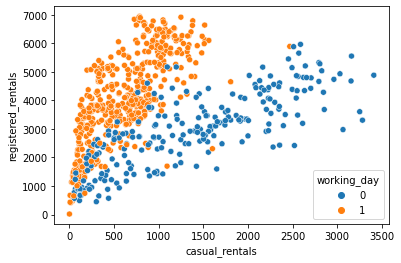

In [ ]:
# Generate a scatterplot that has "casual_rentals" on the x-axis and "registered_rentals" on the y-axis.  
# Then, color the datapoints based on the "working_day."  
# This will help understand the types of bike rentals on weekdays versus weekends. 
#(Use seaborn's "scatterplot" function.)  (As a note, when “working_day” = 0, it is a weekend – Saturday or Sunday.)
sns.scatterplot(data = df_bike, x = 'casual_rentals', y = 'registered_rentals', hue = 'working_day');

####Next, we explore how 'total_rentals' is affected by the four seasons. We will use a swarm plot for visuals. It is similar to strip plot but avoids overlapping of points which gives us a clear visual of the underlying distributions.

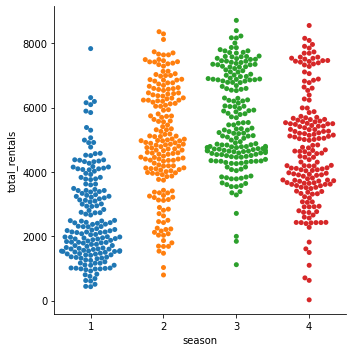

In [ ]:
# Generate a swarmplot to explore the total rentals by season.  
# The "season" should be on the x-asis and "total_rentals" on the y-axis.  (Use seaborn's "catplot" function)
sns.catplot(data = df_bike, x = 'season', y = 'total_rentals', kind = 'swarm');

####We want to know how 'total_rentals' vary each month in 2011 and 2012. A line plot will do the job. We can see clearly the months where bike rentals count starts peaking and where bike rentals count starts to drop. We also get a good idea of the changes in bike rentals between 2011 and 2012 through depicting each year on a separate line. 


*For "yr":*
* 1 represents 2012
* 0 represents 2011

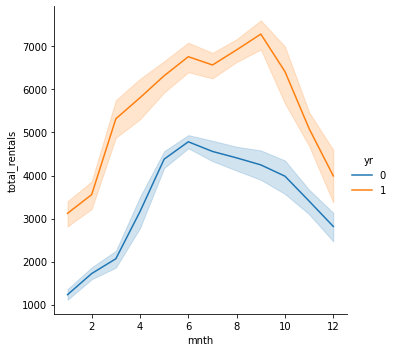

In [ ]:
# Generate a line plot that shows average daily rentals by month and split the lines by year.  
# The "mnth" should on the x-axis, the "total_rentals" on the y-axis, and their should be a line for each value in the "yr" column.  
# (Use seaborn's "relplot" function)
sns.relplot(data = df_bike, x = 'mnth', y = 'total_rentals', hue = 'yr', kind = 'line');

####Pairplot can be used to show pairwise relationship between several variables. In this case, we want to see if there is any relationship between 'total_rentals' and the four weather indicators. 
*Weather indicators are measured in a range between 0 and 1 where 0 represents the lowest and 1 represents the highest.*

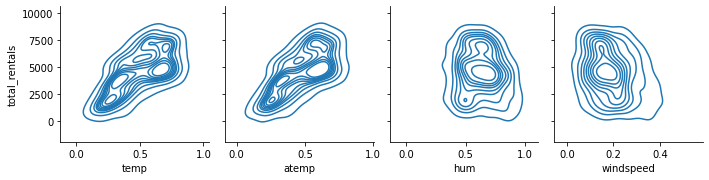

In [ ]:
# Generate a pairplot to show the relationship between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed"), which are continuous variables.  
# (Use seaborn's "pairplot" function and set the kind="kde".)
sns.pairplot(data = df_bike, x_vars = ['temp', 'atemp', 'hum', 'windspeed'], y_vars = 'total_rentals', kind = 'kde');


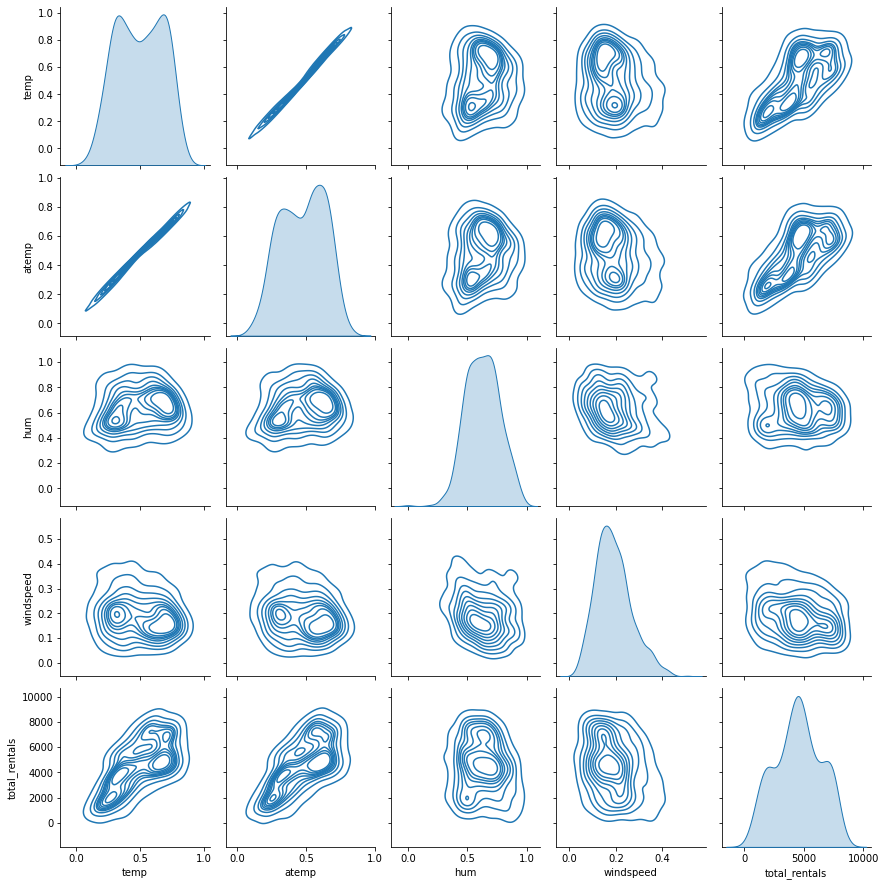

In [ ]:
sns.pairplot(df_bike.iloc[:, [8,9,10,11,14]], kind = 'kde');

####We can get a better understanding of the correlation between 'total_rentals' and the four weather indicators through ploting a heatmap that depicts correlation coefficients for each paired variables. 

,total_rentals,temp,atemp,hum,windspeed
total_rentals,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


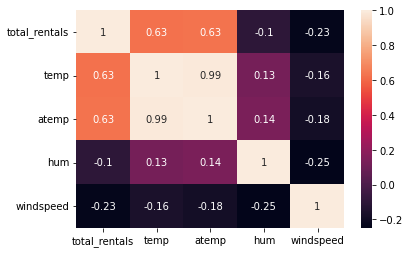

In [ ]:
# Use a heatmap to visualize the correlation between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed")
# Ensure that correlation coefficients are shown on the heatmap
bike = df_bike[['total_rentals', 'temp', 'atemp', 'hum', 'windspeed']].corr()
sns.heatmap(bike, annot=True);
bike

####Now that we have explored out data, we will start creating our model that can help us predict daily bike rentals.
####We will begin by separating our dependent and independent variables. 'Total_rentals' will be our dependent variable since that is what we want to predict. In choosing our independent variable, we want something that has a strong relationship with our dependent variable. In this case, 'temp' would be the perfect variable for us to use to help predict daily total rentals. 
*Even though 'atemp' shows a strong relationship with 'total_rentals', we will not use it since it is highly correlated with our independent variable 'temp'.*

In [ ]:
# Prepare for linear regression by separating the dependent variable (y) and independent variables (X), 
# and only include those independent variables shown in the heatmap that have a correlation coefficient 
# (r) with respect to "total_rentals" that is greater than 0.5 or less than -0.5
X = df_bike[['temp']]
y = df_bike['total_rentals']

####Now we split our data into a training set and testing set. The training set will be used to build our model through recognizing patterns in our data. Later on, the testing set can be used to evaluate our models accuracy

In [ ]:
# Split the data into training and test sets.  Put 25% of the data into the test set.  (Use the "train_test_split" 
# function.) (Ensure the “random_state” is 0.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Train ("fit") the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Identify the intercepts and coefficients of the regression model.
print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]


####Now that we have created our regression model using our training data, we can use it to predict 'total_rentals' with a 'temp' value in mind. 

In [ ]:
# Use the regression model to predict “total_rentals” when "temp" = 0.30
new_temp = [[0.30]]
model.predict(new_temp)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3267.12110394])

####Using our previously stored testing data set, we can use them to test out our model.

In [ ]:
# Use the regression model to predict total bike rentals in the test data.  Store your predictions in a variable 
# called "y_pred"
y_pred = model.predict(X_test)
y_pred

array([5766.52408142, 6175.90654429, 2836.18777293, 2570.13732862,
       3536.45524381, 4279.81152301, 4365.99560363, 4252.87616984,
       4155.91665516, 2643.20601889, 2260.99161202, 3428.72029507,
       3683.06449397, 5901.18791937, 6154.36214013, 5432.55026509,
       5098.57644877, 3843.49370696, 3288.6655081 , 4110.24872374,
       5895.80343432, 2965.46712584, 3391.01597179, 5804.22840469,
       2378.32555272, 5437.93475014, 6811.52787475, 5572.60505206,
       4748.44917729, 5098.57644877, 2222.11084664, 5561.829618  ,
       4215.17184656, 5820.38832381, 3741.14324327, 3369.46510367,
       6348.28116949, 6897.71841933, 4010.47738314, 4290.58049311,
       5012.39236815, 3677.44084212, 5314.04634625, 3961.9976258 ,
       5965.82759582, 4651.48966262, 3092.87192813, 5680.33353684,
       3035.49775131, 2963.59257522, 5933.5077576 , 6122.04230191,
       4328.29128035, 5567.21410304, 5917.34783848, 4295.97144213,
       3428.72029507, 4274.420574  , 6052.01167644, 3046.26672

####We can compare our predictions (y_pred) with the actual data (y_test) to see how close our predictions are. We can generate r squared value to show this. In the case of our r squared value of 0.375, it suggests that our data did not fit the regression model well. There is a decent amount of variation between predicted and actual data. 

In [ ]:
# Generate the R squared
metrics.r2_score(y_test, y_pred)

0.37540464616240443